# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.



In [51]:
# Importando as bibliotecas necessárias

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [13]:
# Carregando o arquivo CSV em um DataFrame
df = pd.read_csv('previsao_de_renda.csv')
df.head() # mostra as 5 primeiras linhas do dataframe

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


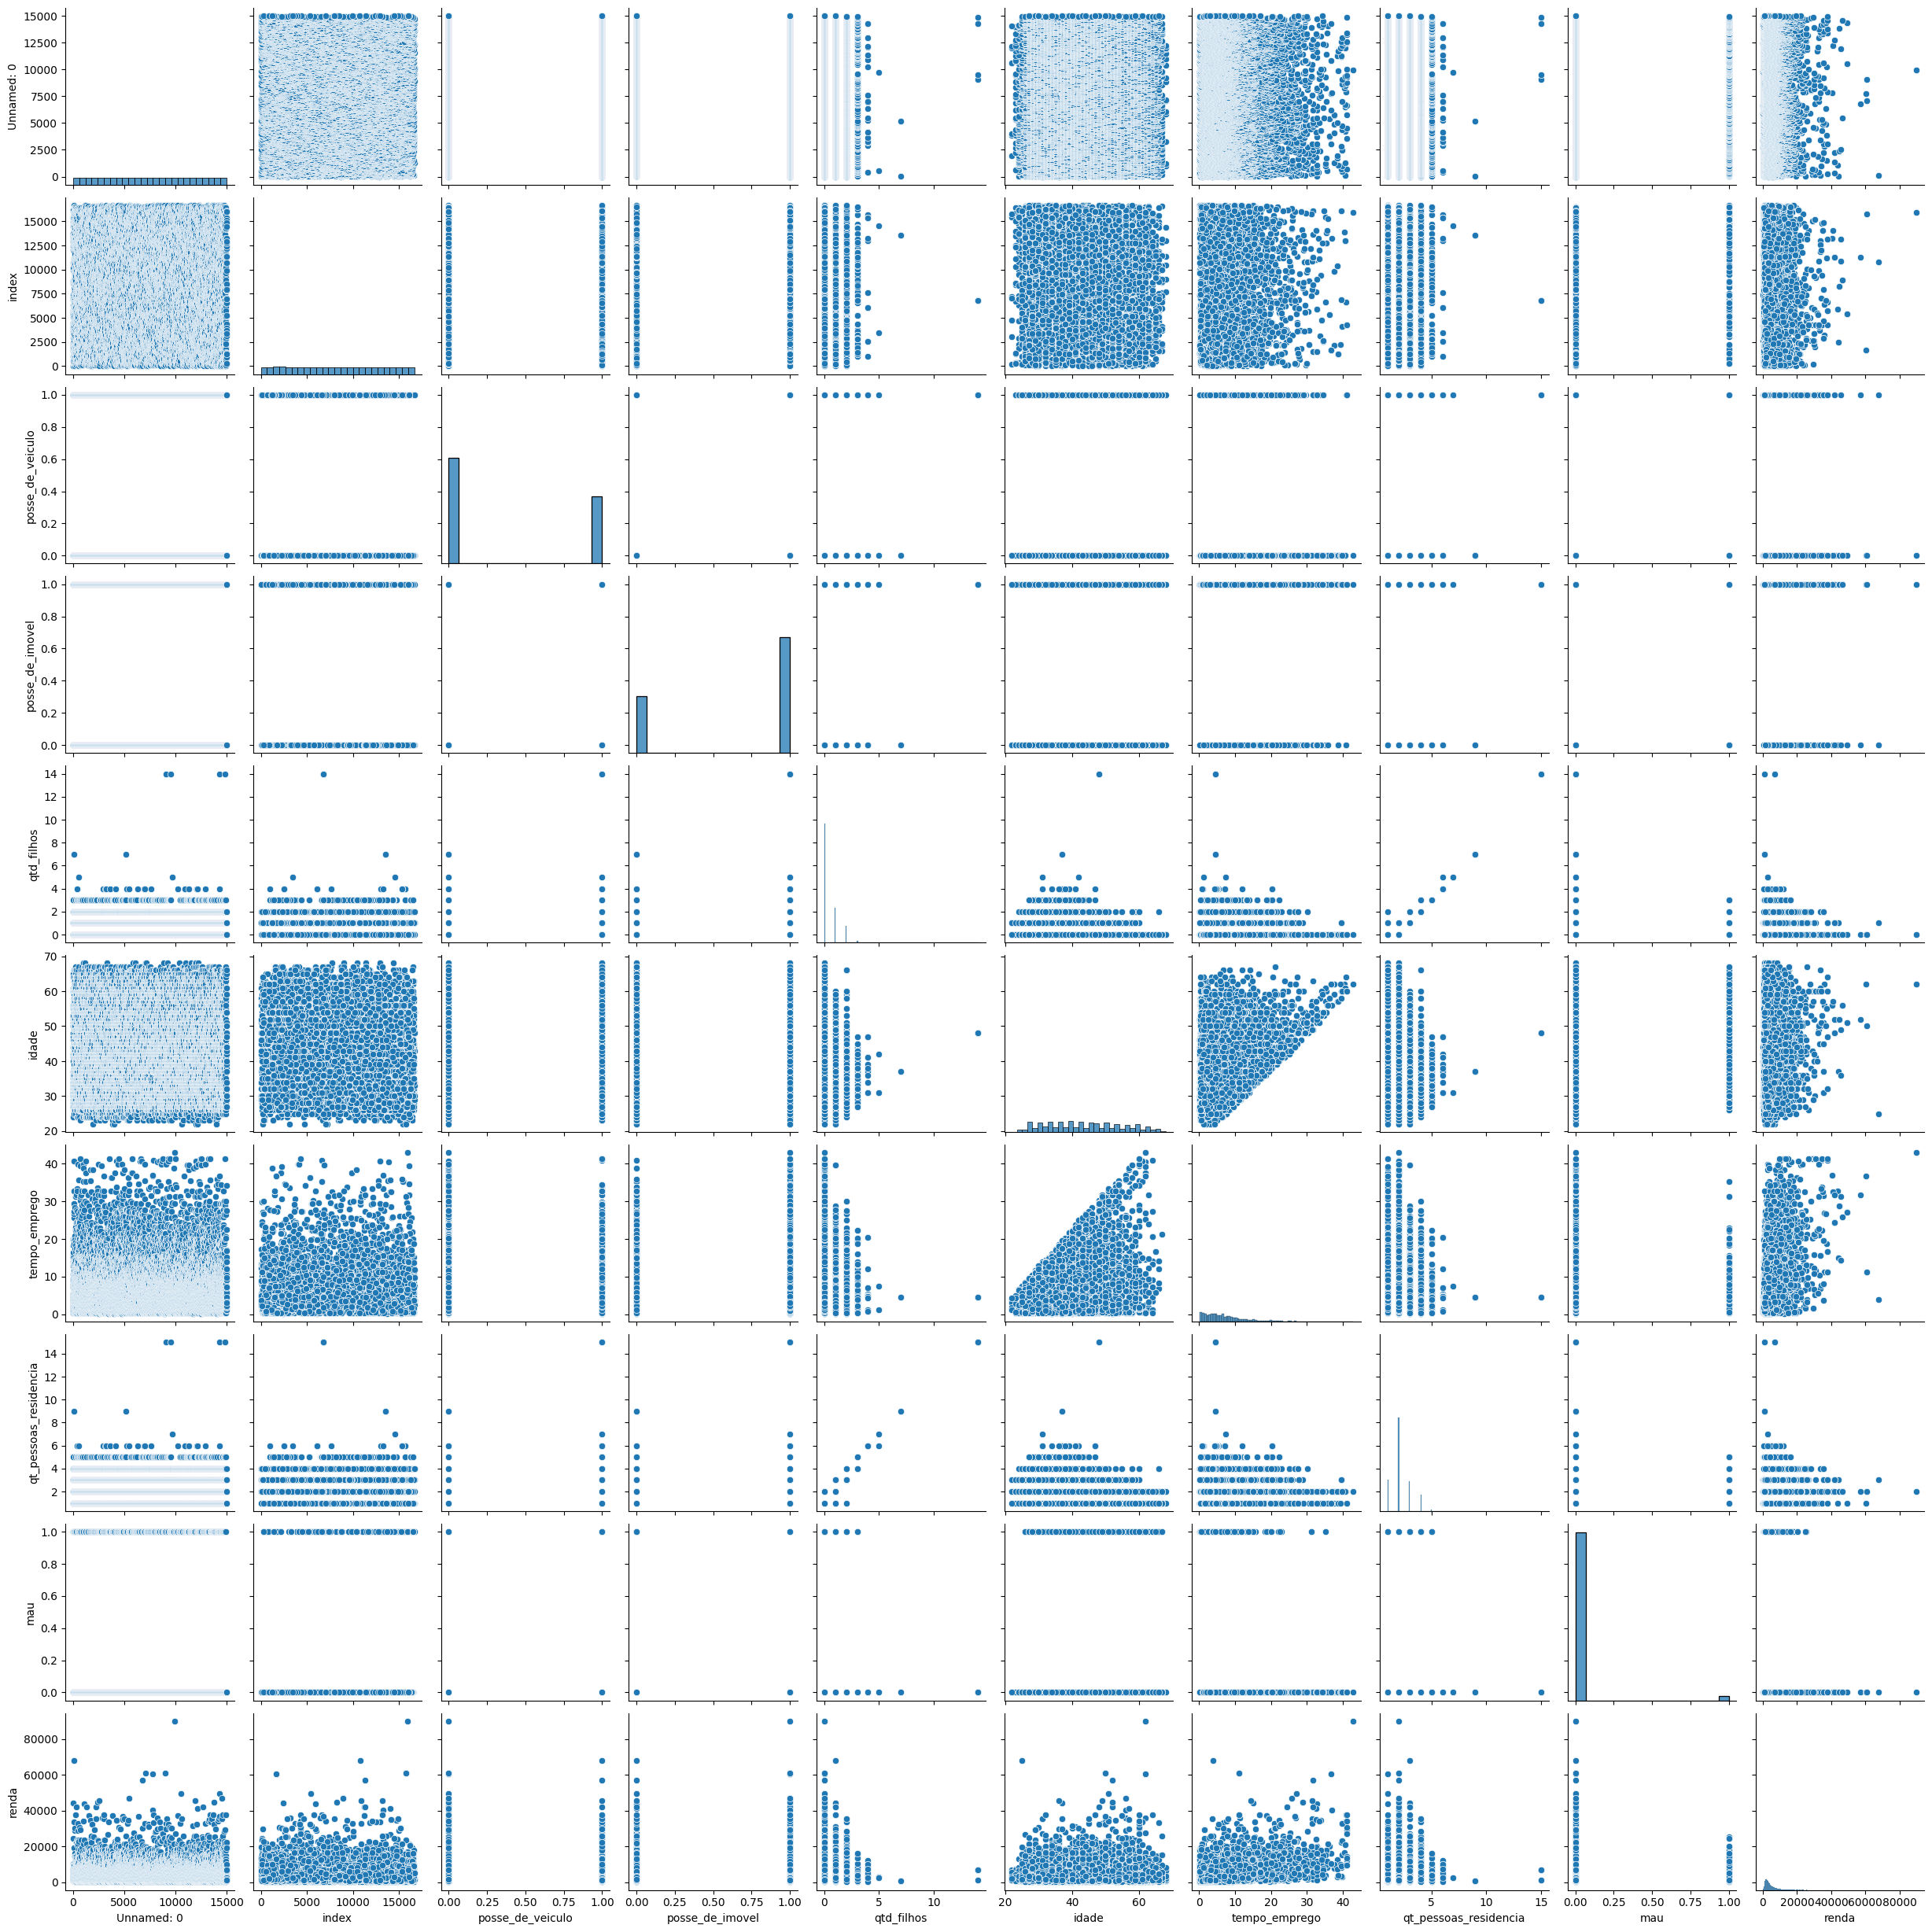

In [14]:
# Criando um gráfico de matriz de dispersão
sns.pairplot(df)

In [16]:
# Calculando a matriz de correlações
corr_matrix = df.corr()
corr_matrix

<ipython-input-16-c5a28ff7cc09>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,Unnamed: 0,index,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
Unnamed: 0,1.000000,-0.001868,0.002567,0.004003,0.015612,-0.004328,-0.002146,0.016628,0.019061,0.007646
index,-0.001868,1.000000,-0.007542,-0.099683,0.039734,-0.047971,-0.034574,0.041818,0.130691,-0.001740
posse_de_veiculo,0.002567,-0.007542,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,-0.017617,0.063414
posse_de_imovel,0.004003,-0.099683,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,-0.022499,0.029827
qtd_filhos,0.015612,0.039734,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009544,0.009567
idade,-0.004328,-0.047971,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,-0.011087,0.042570
tempo_emprego,-0.002146,-0.034574,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,-0.047722,0.394235
qt_pessoas_residencia,0.016628,0.041818,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,-0.001555,0.020977
mau,0.019061,0.130691,-0.017617,-0.022499,0.009544,-0.011087,-0.047722,-0.001555,1.000000,-0.011577
renda,0.007646,-0.001740,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,-0.011577,1.000000


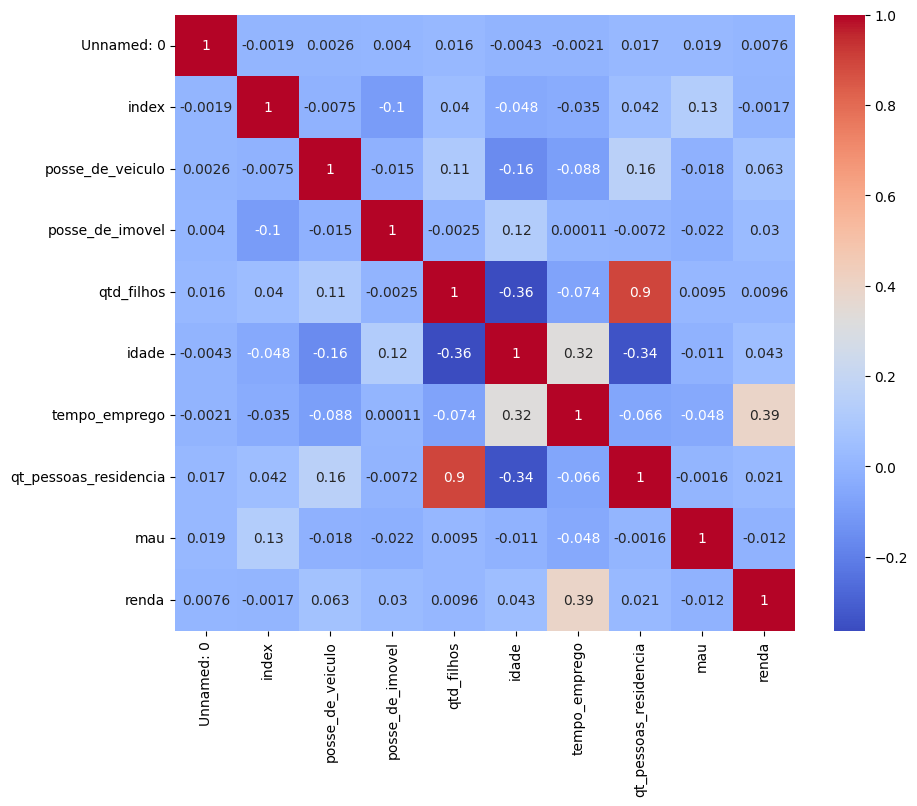

In [9]:
# Criando um gráfico da matriz de correlações
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

>  A análise inicial revelou que a variável ‘tempo_emprego’ tem a maior correlação com a ‘renda’, com um coeficiente de correlação de 39%. As outras variáveis, no entanto, mostraram uma correlação insignificante, não ultrapassando 1%.


> A matriz de dispersão, ou pairplot, revelou a presença de outliers na variável ‘renda’. Esses outliers estão principalmente associados aos clientes com renda empresarial. Apesar de sua baixa frequência, esses outliers podem afetar a análise de tendência.



> Além disso, a matriz de dispersão reforçou a baixa correlação entre a maioria das variáveis quantitativas, o que está alinhado com os resultados da matriz de correlação.



> A análise do clustermap também confirmou os resultados anteriores de baixa correlação com a variável ‘renda’. Apenas a variável ‘tempo_emprego’ mostrou um coeficiente de correlação considerável. As variáveis booleanas ‘posse_de_imovel’ e ‘posse_de_veiculo’ também foram analisadas, mas mostraram uma baixa correlação com ‘renda’.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

###### As variáveis 'tempo_emprego' e 'idade' são as duas variáveis mais correlacionadas com a renda

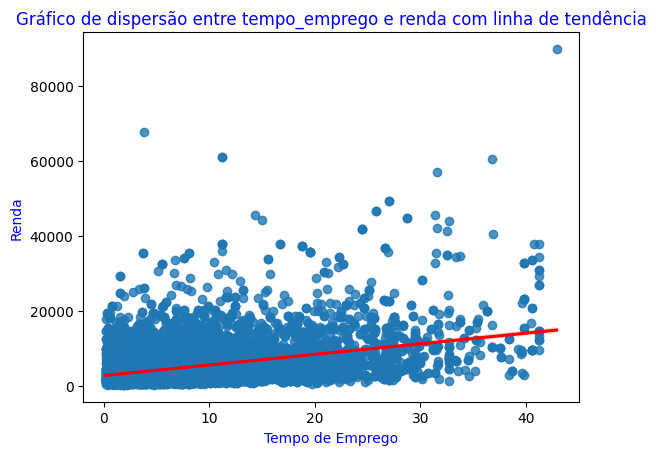

In [32]:
# Gráfico de dispersão com linha de tendência para 'tempo_emprego' e 'renda'
ax = sns.regplot(x='tempo_emprego', y='renda', data=df, line_kws={'color': 'red'})


ax.set_xlabel('Tempo de Emprego', color='blue')
ax.set_ylabel('Renda', color='blue')
plt.title('Gráfico de dispersão entre tempo_emprego e renda com linha de tendência', color='blue')

plt.show()

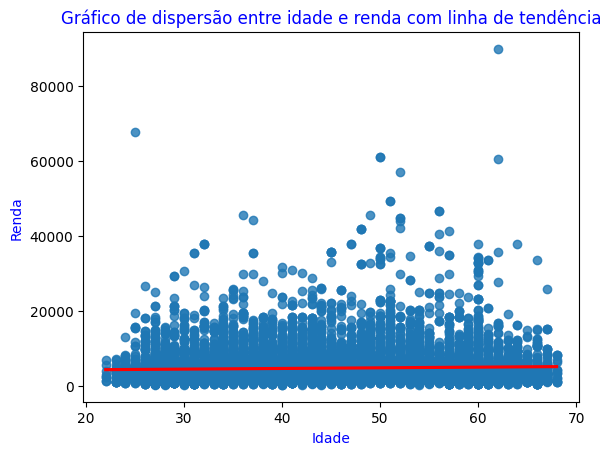

In [34]:
# Gráfico de dispersão com linha de tendência para 'idade' e 'renda'
ax = sns.regplot(x='idade', y='renda', data=df, line_kws={'color': 'red'})

ax.set_xlabel('Idade', color='blue')
ax.set_ylabel('Renda', color='blue')
plt.title('Gráfico de dispersão entre idade e renda com linha de tendência', color='blue')

plt.show()

3) Na su aopinião, há outliers na variável renda?

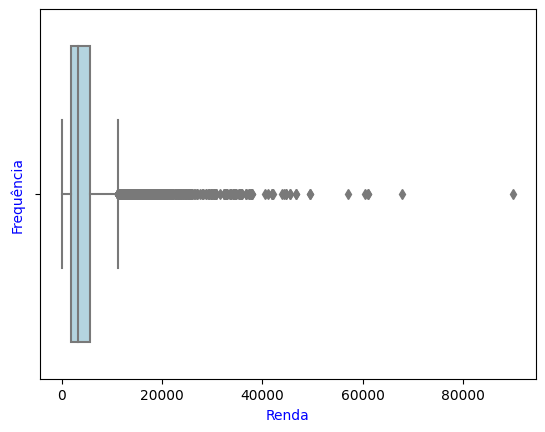

In [49]:
# Utilizando o boxplot, pois é uma maneira gráfica de exibir a distribuição de dados e seus outliers
boxplot = sns.boxplot(x=df['renda'], color='lightblue')

boxplot.set_xlabel("Renda", color='blue')
boxplot.set_ylabel("Frequência", color='blue')

plt.show()


> Na análise exploratória dos dados, observou-se a presença de outliers na variável ‘renda’ para os clientes que possuem renda empresarial. No entanto, é importante destacar que a incidência desses outliers é relativamente baixa.

Embora os outliers possam muitas vezes indicar variações significativas nos dados, neste caso, devido à sua baixa frequência, eles podem não ter um impacto substancial na análise geral de tendências. Isso sugere que, apesar da presença desses valores extremos, a distribuição geral da renda para os clientes com renda empresarial pode ainda ser bem representada.


4) Calcule o logaritmo da variável renda e repita a sequência de análise

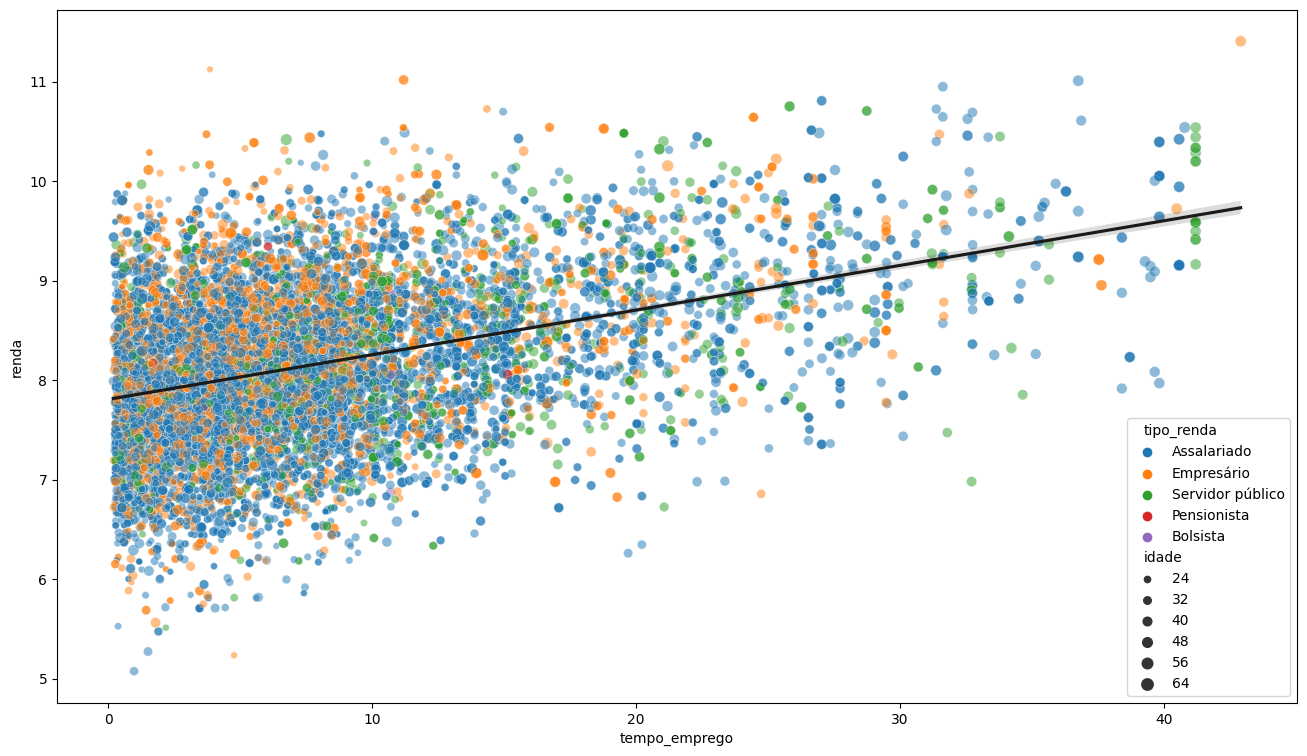

In [62]:
# Copiando o dataframe e calculando o logaritmo da variável 'renda'
df_log = df.copy()
df_log['renda'] = np.log(df_log['renda'])

# Criando um gráfico de dispersão com uma linha de tendência
plt.figure(figsize=(16,9))

sns.scatterplot(x='tempo_emprego',  # variável no eixo x
                y='renda',  # variável no eixo y
                hue='tipo_renda',  # variável que define a cor dos pontos
                size='idade',  # variável que define o tamanho dos pontos
                data=df_log,
                alpha=0.5)  # transparência dos pontos

# Adicionando uma linha de tendência ao gráfico
sns.regplot(x='tempo_emprego',
            y='renda',
            data=df_log,
            scatter=False,  # não mostrar os pontos novamente
            color='.1')  # cor da linha de tendência

plt.show()

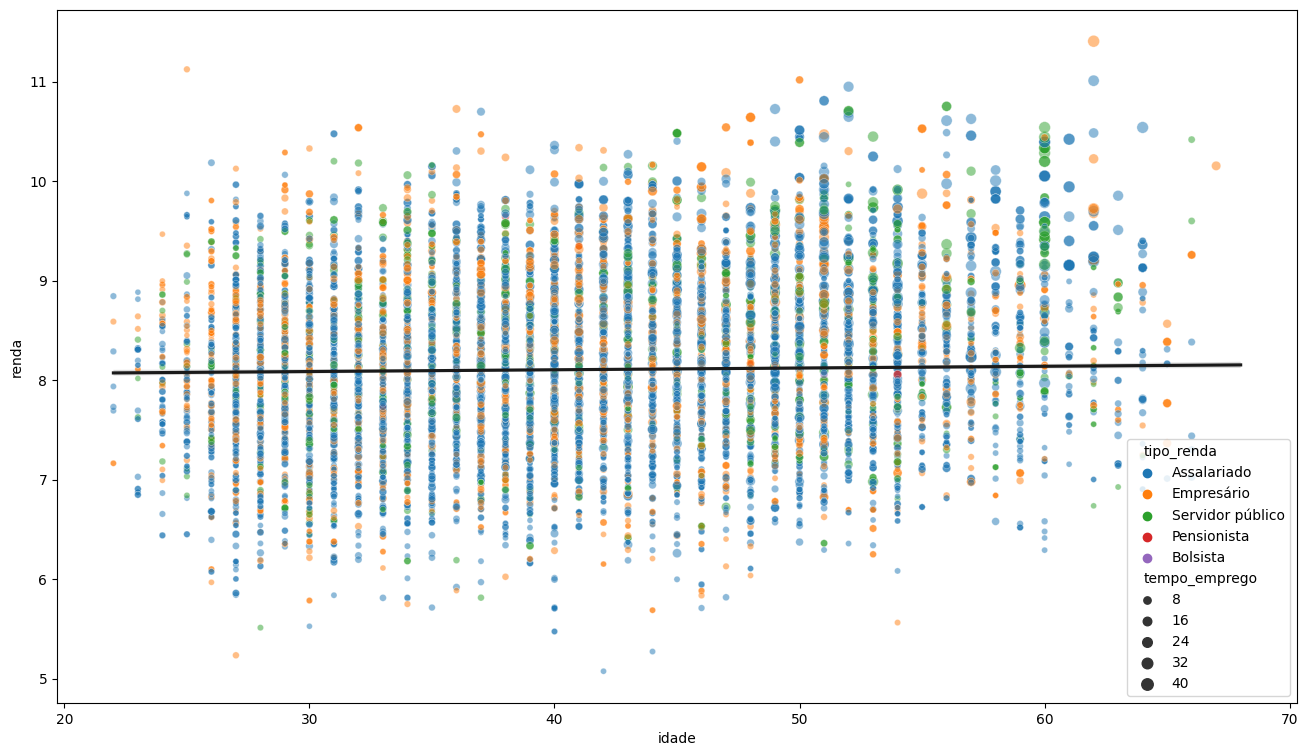

In [64]:
# Criando um gráfico de dispersão com uma linha de tendência
plt.figure(figsize=(16,9))

sns.scatterplot(x='idade',  # variável no eixo x
                y='renda',  # variável no eixo y
                hue='tipo_renda',  # variável que define a cor dos pontos
                size='tempo_emprego',  # variável que define o tamanho dos pontos
                data=df_log,
                alpha=0.5)  # transparência dos pontos

# Adicionando uma linha de tendência ao gráfico
sns.regplot(x='idade',
            y='renda',
            data=df_log,
            scatter=False,  # não mostrar os pontos novamente
            color='.1')  # cor da linha de tendência

plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [68]:
# Diferença após aplicação do LOG:

pd.concat(objs=[df.corr().tail(1), df_log.corr().tail(1)], axis=0).reset_index(drop=True).rename(index={0:'renda', 1:'renda_log'})

<ipython-input-68-684a47474518>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.concat(objs=[df.corr().tail(1), df_log.corr().tail(1)], axis=0).reset_index(drop=True).rename(index={0:'renda', 1:'renda_log'})


,Unnamed: 0,index,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda,log_renda
renda,0.004999,0.002993,0.090529,0.045297,0.023743,0.024712,0.379556,0.036267,-0.014193,0.835734,1.0
renda_log,0.004999,0.002993,0.090529,0.045297,0.023743,0.024712,0.379556,0.036267,-0.014193,1.000000,1.0


Nota-se com a matriz de correlação que a aplicação do LOG fez com que melhorasse a correlaçãoda da variável renda.